# Deep Learning

## Part 1: Image Classification - CIFAR-10 (MLP)

---
> Kostis Konstantinos (p3352311) <br>
> Karousis Nikolaos (p3352321) <br>
> MSc Data Science (Part-Time) <br>
> Athens University Of Economics and Business

In [1]:
# Install needed libraries
!pip install keras-tuner==1.4.7

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 2.6 MB/s eta 0:00:00


## Access to code

In [2]:
import sys
import os
from google.colab import drive

# Mount the drive
drive.mount('/content/drive', force_remount=True)

# Define the base path
base_path = '/content/drive/MyDrive/deep-learning-msc-data-science-2024-2025'

# Define the code path
code_folder = os.path.join(base_path, 'code')

# Add the 'code' folder to the sys.path
sys.path.append(code_folder)

Mounted at /content/drive


In [3]:
# Load necessary libs and modules
from constants import *
from mlp import MLPTuner, MLP

## Load Dataset

In [19]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

def load_and_preprocess_cifar10(validation_size=0.2, normalize=True, as_categorical=True, flatten=True, seed=None):
    # Load the CIFAR-10 dataset
    (train_X, train_y), (test_X, test_y) = tf.keras.datasets.cifar10.load_data()

    # Flatten the images if required
    if flatten:
        train_X = train_X.reshape((train_X.shape[0], -1))  # Reshaping to 3072
        test_X = test_X.reshape((test_X.shape[0], -1))  # Reshaping to 3072

    # Normalize the image data to [0, 1] if normalization is True
    if normalize:
        train_X = train_X.astype('float32') / 255.0
        test_X = test_X.astype('float32') / 255.0

    # Convert the labels to one-hot vectors if as_categorical is True
    if as_categorical:
        train_y = to_categorical(train_y, num_classes=10)
        test_y = to_categorical(test_y, num_classes=10)

    # Create a validation split from the training data if validation_size is greater than 0
    if validation_size > 0:
        X_train, X_val, y_train, y_val = train_test_split(train_X, train_y,
                                                          test_size=validation_size,
                                                          random_state=seed,
                                                          stratify=train_y)
        return (X_train, y_train), (X_val, y_val), (test_X, test_y)
    else:
        return (train_X, train_y), (test_X, test_y)

# Load and preprocess CIFAR-10 data
train_data, val_data, test_data = load_and_preprocess_cifar10(validation_size=0.2, normalize=True, as_categorical=True, flatten=True, seed=42)

# Unpack the data
X_train, y_train = train_data
X_val, y_val = val_data
X_test, y_test = test_data

# Check shapes of the arrays
print("Training data shape:", X_train.shape)
print("Training labels shape:", y_train.shape)
print("Validation data shape:", X_val.shape)
print("Validation labels shape:", y_val.shape)
print("Test data shape:", X_test.shape)
print("Test labels shape:", y_test.shape)


Training data shape: (40000, 3072)
Training labels shape: (40000, 10)
Validation data shape: (10000, 3072)
Validation labels shape: (10000, 10)
Test data shape: (10000, 3072)
Test labels shape: (10000, 10)


## Multi Layer Perceptron

In [20]:
tuner_directory = os.path.join(base_path, TUNERS_DIR)
cifar_mlp_tuner = MLPTuner(train_data, val_data,
                           tuner_directory, CIFAR_10_MLP_TUNER_PROJECT_NAME,
                           train_size=0.5)


In [21]:
cifar_mlp_keras_tuner = cifar_mlp_tuner.tune()

Reloading Tuner from /content/drive/MyDrive/deep-learning-msc-data-science-2024-2025/tuners/cifar_10_mlp/tuner0.json


In [22]:
cifar_mlp_best_hyperparams = cifar_mlp_keras_tuner.get_best_hyperparameters()[0].values
cifar_mlp_best_hyperparams

{'num_layers': 3,
 'hidden_units_0': 256,
 'activation_layer_0': 'tanh',
 'dropout_layer_0': 0.4,
 'learning_rate': 0.0001,
 'hidden_units_1': 64,
 'activation_layer_1': 'tanh',
 'dropout_layer_1': 0.2,
 'hidden_units_2': 64,
 'activation_layer_2': 'relu',
 'dropout_layer_2': 0.1}

In [23]:
cifar_mlp_keras_tuner.get_best_models()[0].summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 256)                 │         786,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │          16,448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 807,946 (3.08 MB)

 Trainable params: 807,946 (3.08 MB)

 Non-trainable params: 0 (0.00 B)

### Fit the MLP

In [24]:
models_directory = os.path.join(base_path, MODELS_DIR)
cifar_mlp = MLP(models_dir=models_directory, weights_name=CIFAR_10_MLP_WEIGHTS,
                  class_ids=CIFAR_10_CLASS_IDS, class_labels=CIFAR_10_CLASS_LABELS)

In [25]:
# Fitting the model directly with dataset tuples
cifar_mlp.fit(
    train_dataset=train_data,
    validation_dataset=val_data,
    hyperparams=cifar_mlp_best_hyperparams
)


Epoch 1/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
 — val_f1: 0.284844 — val_precision: 0.311674 — val_recall: 0.307400

Epoch 1: val_f1 improved from -inf to 0.28484, saving model to /content/drive/MyDrive/deep-learning-msc-data-science-2024-2025/models/cifar_10_mlp.weights.h5
313/313 ━━━━━━━━━━━━━━━━━━━━ 11s 25ms/step - categorical_accuracy: 0.1640 - loss: 2.2212 - val_categorical_accuracy: 0.3074 - val_loss: 1.9515 - val_f1: 0.2848 - val_recall: 0.3074 - val_precision: 0.3117
Epoch 2/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
 — val_f1: 0.325595 — val_precision: 0.340903 — val_recall: 0.340000

Epoch 2: val_f1 improved from 0.28484 to 0.32560, saving model to /content/drive/MyDrive/deep-learning-msc-data-science-2024-2025/models/cifar_10_mlp.weights.h5
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - categorical_accuracy: 0.2611 - loss: 2.0069 - val_categorical_accuracy: 0.3400 - val_loss: 1.8715 - val_f1: 0.3256 - val_recall: 0.3400 - val_precision: 0.3409
Epoch 3/100
313/313 ━━━━━━━

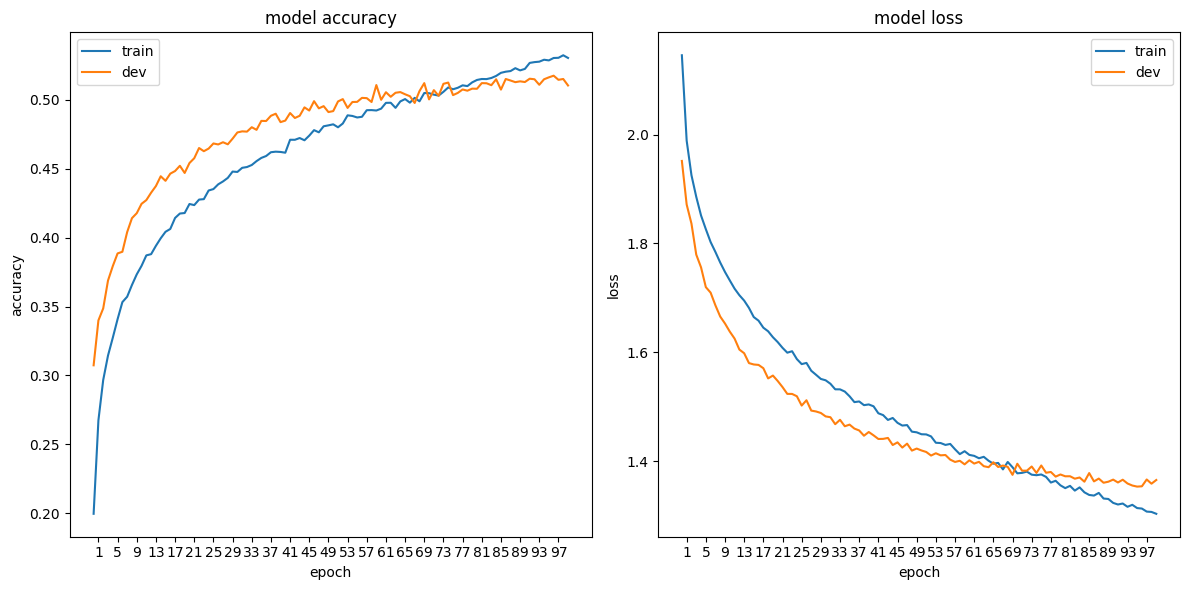

In [26]:
cifar_mlp.plot_curves()

### Evaluating the MLP on the training set (Classification Report)

In [27]:
train_classification_report_df, train_macro_average_df = cifar_mlp.classification_report(train_data)

1250/1250 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step


In [28]:
train_classification_report_df

,Class Id,Class Name,Precision,Recall,F1,Precision-Recall AUC
0,0,airplane,0.670576,0.62900,0.649123,0.703833
1,1,automobile,0.724421,0.72750,0.725957,0.800040
2,2,bird,0.508926,0.37775,0.433635,0.474088
3,3,cat,0.435625,0.46100,0.447953,0.453649
4,4,deer,0.535714,0.54000,0.537849,0.579578
5,5,dog,0.514552,0.46850,0.490448,0.535860
6,6,frog,0.636548,0.70450,0.668803,0.742730
7,7,horse,0.669935,0.75150,0.708378,0.802622
8,8,ship,0.718323,0.76250,0.739753,0.820631
9,9,truck,0.663647,0.69600,0.679439,0.762365


In [29]:
train_macro_average_df

,Macro Average Precision,Macro Average Recall,Macro Average F1,Macro Average Precision Recall AUC
0,0.607827,0.611825,0.608134,0.66754


### Evaluating the MLP on the validation set (Classification Report)

In [30]:
val_classification_report_df, val_macro_average_df = cifar_mlp.classification_report(val_data)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [31]:
val_classification_report_df

,Class Id,Class Name,Precision,Recall,F1,Precision-Recall AUC
0,0,airplane,0.583864,0.550,0.566426,0.607809
1,1,automobile,0.660204,0.647,0.653535,0.711741
2,2,bird,0.416223,0.313,0.357306,0.371373
3,3,cat,0.344925,0.367,0.355620,0.348610
4,4,deer,0.456410,0.445,0.450633,0.464945
5,5,dog,0.420551,0.397,0.408436,0.455719
6,6,frog,0.526316,0.560,0.542636,0.571816
7,7,horse,0.555160,0.624,0.587571,0.656047
8,8,ship,0.618692,0.662,0.639614,0.715869
9,9,truck,0.563134,0.611,0.586091,0.609128


In [32]:
val_macro_average_df

,Macro Average Precision,Macro Average Recall,Macro Average F1,Macro Average Precision Recall AUC
0,0.514548,0.5176,0.514787,0.551306


### Evaluating the MLP on the test set (Classification Report)

In [33]:
test_classification_report_df, test_macro_average_df = cifar_mlp.classification_report(test_data)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [34]:
test_classification_report_df

,Class Id,Class Name,Precision,Recall,F1,Precision-Recall AUC
0,0,airplane,0.602116,0.569,0.585090,0.624096
1,1,automobile,0.639344,0.624,0.631579,0.684044
2,2,bird,0.415426,0.307,0.353076,0.378143
3,3,cat,0.349524,0.367,0.358049,0.353271
4,4,deer,0.440524,0.437,0.438755,0.451532
5,5,dog,0.420886,0.399,0.409651,0.447525
6,6,frog,0.549692,0.625,0.584932,0.602394
7,7,horse,0.555154,0.614,0.583096,0.657077
8,8,ship,0.642586,0.676,0.658869,0.723048
9,9,truck,0.558294,0.589,0.573236,0.612627


In [35]:
test_macro_average_df

,Macro Average Precision,Macro Average Recall,Macro Average F1,Macro Average Precision Recall AUC
0,0.517355,0.5207,0.517633,0.553376
